In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('C:\\Users\\HP\Downloads\\BYOP\\Loan_Data.csv')

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,12.0,1.0,Urban,Y


In [7]:
data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.000000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,11.450833,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,2.292945,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,0.500000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,12.000000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,12.000000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,12.000000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,18.000000,1.000000


In [8]:
data.info

<bound method DataFrame.info of      Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0      Male      No          0      Graduate            No            584900   
1      Male     Yes          1      Graduate            No            458300   
2      Male     Yes          0      Graduate           Yes            300000   
3      Male     Yes          0  Not Graduate            No            258300   
4      Male      No          0      Graduate            No            600000   
..      ...     ...        ...           ...           ...               ...   
609  Female      No          0      Graduate            No            290000   
610    Male     Yes         3+      Graduate            No            410600   
611    Male     Yes          1      Graduate            No            807200   
612    Male     Yes          2      Graduate            No            758300   
613  Female      No          0      Graduate           Yes            458300   

     Co

### MISSING VALUE TREATMENT IN DATA

In [9]:
data.apply(lambda x: sum(x.isnull()), axis=0)
#Showing count of missing values in each column

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
data.Gender = data.Gender.fillna('Male')

In [9]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
data.Married = data.Married.fillna('Yes')

In [11]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
data.Dependents = data.Dependents.fillna('0')

In [13]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [15]:
data.Loan_Amount = data.Loan_Amount.fillna(data.Loan_Amount.mean())

In [16]:
data['Term'].value_counts()

12.0    512
6.0      44
18.0     15
10.0     13
8.0       4
3.0       4
4.0       3
2.0       2
1.0       2
0.5       1
Name: Term, dtype: int64

In [17]:
data.Term = data.Term.fillna(12.0)

In [18]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [20]:
data['Status'].value_counts()

Y    422
N    192
Name: Status, dtype: int64

In [21]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [22]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

#  Data Visualization

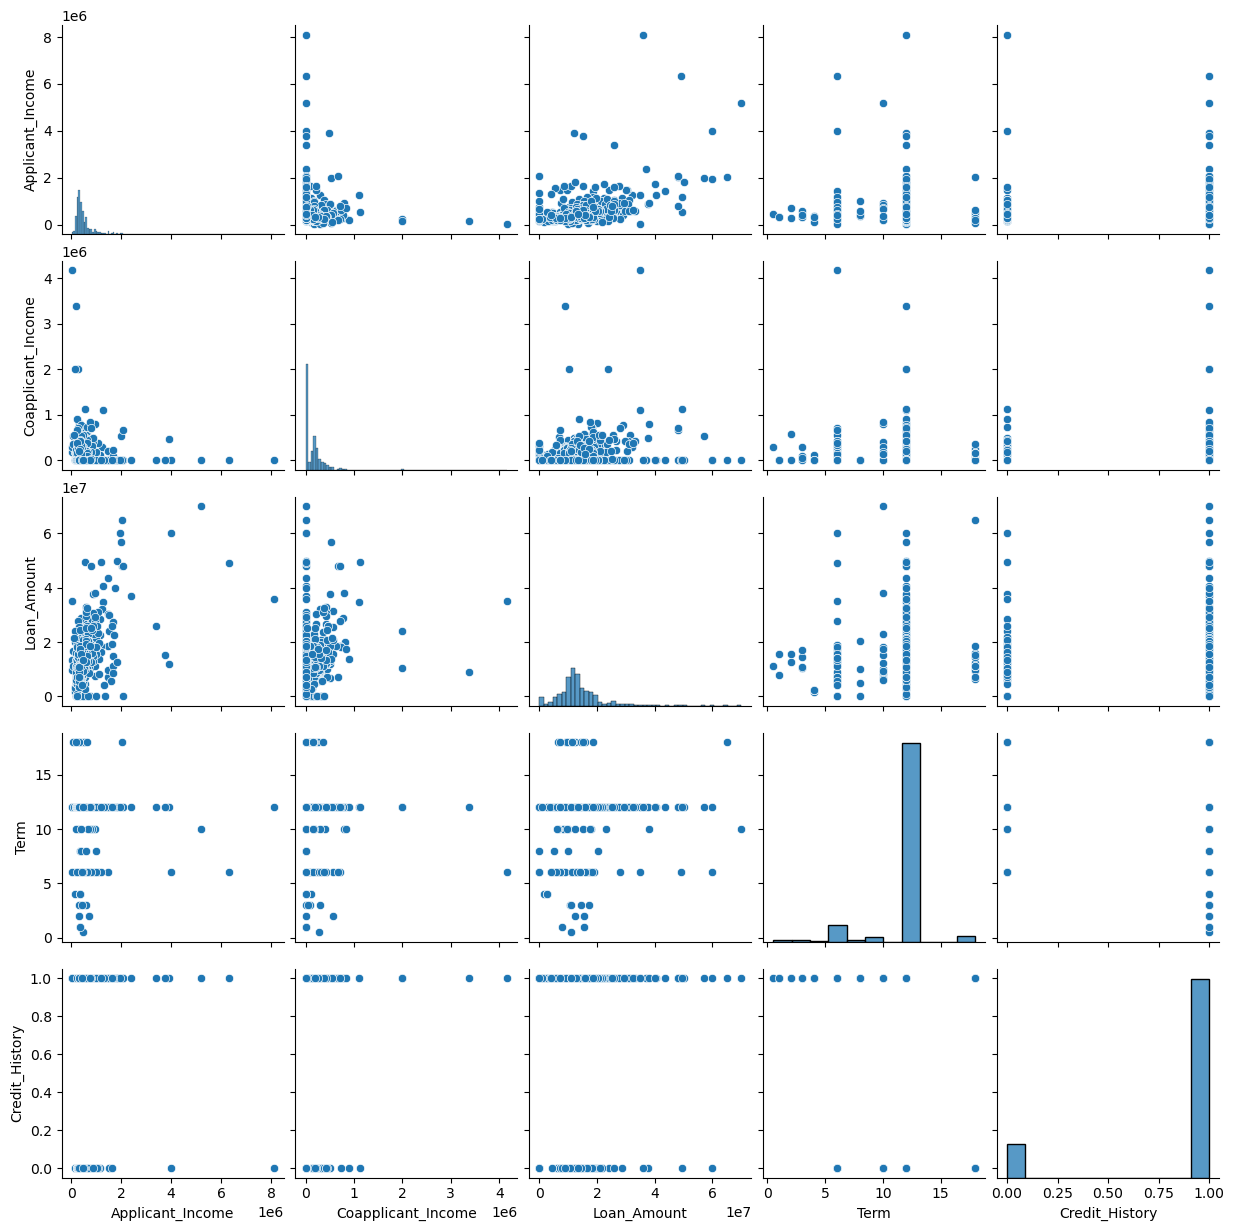

In [23]:
sns.pairplot(data)

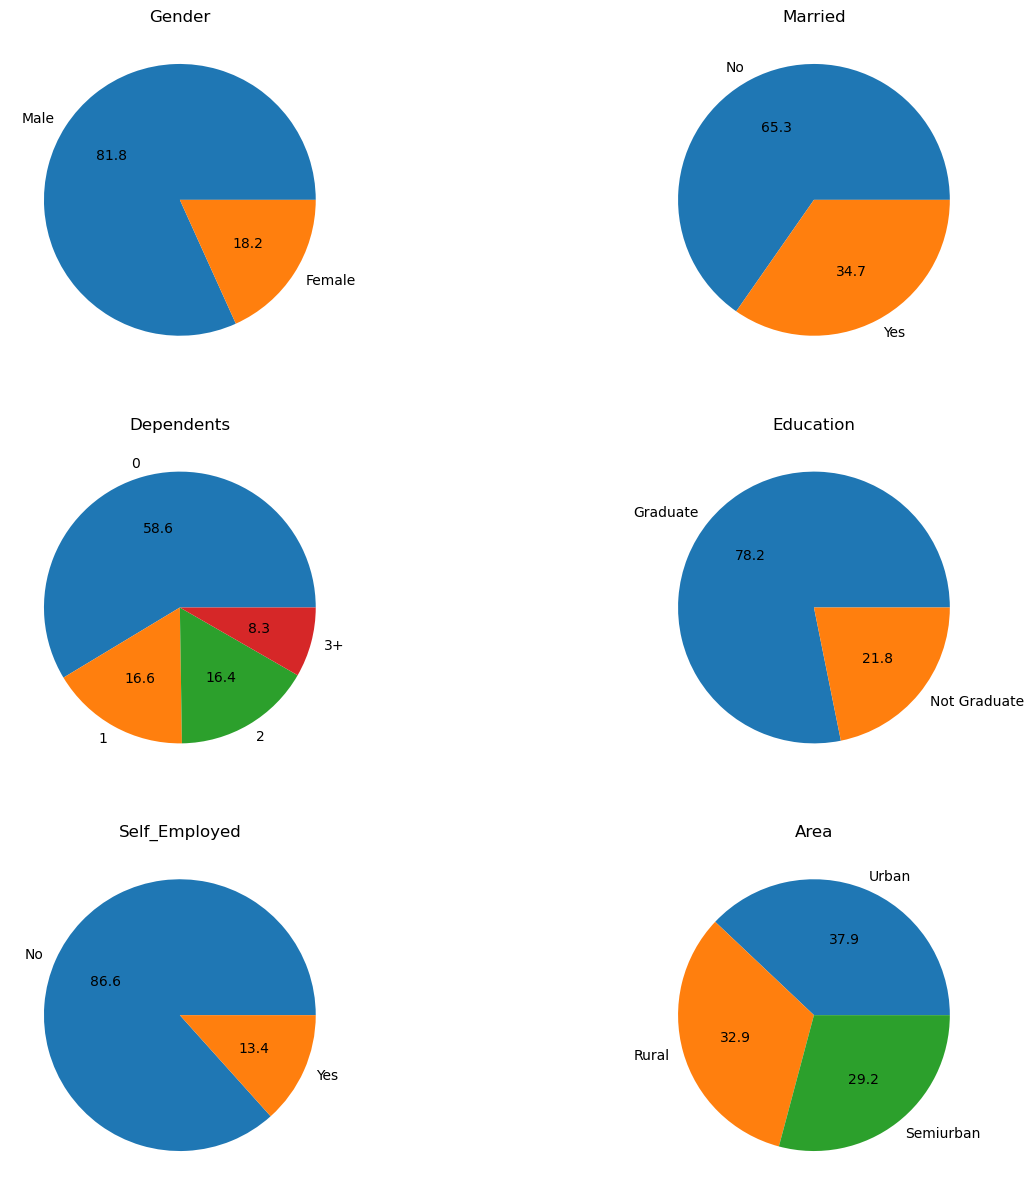

In [24]:
a = data["Gender"].value_counts().to_numpy()
b = data["Married"].value_counts().to_numpy()
c = data["Dependents"].value_counts().to_numpy()
d = data["Education"].value_counts().to_numpy()
e = data["Self_Employed"].value_counts().to_numpy()
f = data["Area"].value_counts().to_numpy()

fig, axs = plt.subplots(3, 2, figsize = (15, 15))
_ = axs[0, 0].pie(a, labels = data["Gender"].unique(), autopct = '%0.1f')
axs[0, 0].set_title('Gender')
_ = axs[0, 1].pie(b, labels = data["Married"].unique(), autopct = '%0.1f')
axs[0, 1].set_title('Married')
_ = axs[1, 0].pie(c, labels = data["Dependents"].unique(), autopct = '%0.1f')
axs[1, 0].set_title('Dependents')
_ = axs[1, 1].pie(d, labels = data["Education"].unique(), autopct = '%0.1f')
axs[1, 1].set_title('Education')
_ = axs[2, 0].pie(e, labels = data["Self_Employed"].unique(), autopct = '%0.1f')
axs[2, 0].set_title('Self_Employed')
_ = axs[2, 1].pie(f, labels = data["Area"].unique(), autopct = '%0.1f')
_ = axs[2, 1].set_title('Area')

In [25]:
!pip install -U seaborn

### Check Correlation

<Axes: >

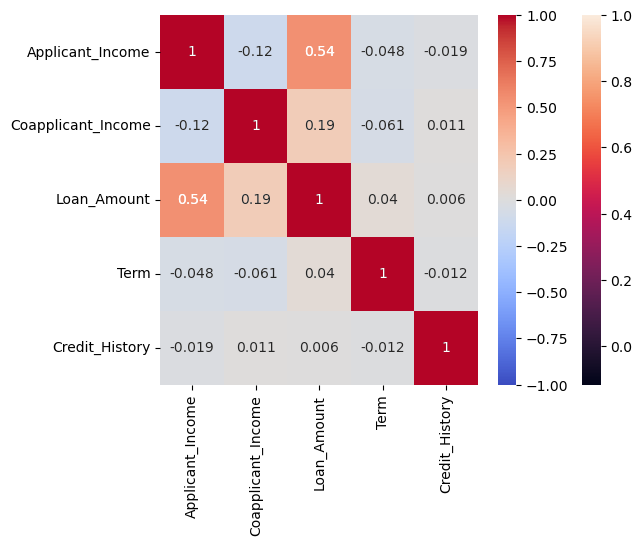

In [26]:
import seaborn as sns

# check correlation between numeric data
xdata= data.select_dtypes(include='number')
sns.heatmap(xdata.corr(), annot = True)
sns.heatmap(xdata.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

interpretation of Heatmap: Loan Amount is positively correlated with applicant income, co applicant income, term and credit history.

In [27]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [28]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,12.0,1.0,Urban,Y


## Onehot encoder to represent categorical variables as binary vectors. 

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [30]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [31]:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [32]:
data = pd.get_dummies(data,prefix=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Area'], columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Area'])

In [33]:
print(data)

     Applicant_Income  Coapplicant_Income  Loan_Amount  Term  Credit_History  \
0              584900                 0.0     15000000  12.0             1.0   
1              458300            150800.0     12800000  12.0             1.0   
2              300000                 0.0      6600000  12.0             1.0   
3              258300            235800.0     12000000  12.0             1.0   
4              600000                 0.0     14100000  12.0             1.0   
..                ...                 ...          ...   ...             ...   
609            290000                 0.0      7100000  12.0             1.0   
610            410600                 0.0      4000000   6.0             1.0   
611            807200             24000.0     25300000  12.0             1.0   
612            758300                 0.0     18700000  12.0             1.0   
613            458300                 0.0     13300000  12.0             0.0   

    Status  Gender_Female  Gender_Male 

In [34]:
data.head

<bound method NDFrame.head of      Applicant_Income  Coapplicant_Income  Loan_Amount  Term  Credit_History  \
0              584900                 0.0     15000000  12.0             1.0   
1              458300            150800.0     12800000  12.0             1.0   
2              300000                 0.0      6600000  12.0             1.0   
3              258300            235800.0     12000000  12.0             1.0   
4              600000                 0.0     14100000  12.0             1.0   
..                ...                 ...          ...   ...             ...   
609            290000                 0.0      7100000  12.0             1.0   
610            410600                 0.0      4000000   6.0             1.0   
611            807200             24000.0     25300000  12.0             1.0   
612            758300                 0.0     18700000  12.0             1.0   
613            458300                 0.0     13300000  12.0             0.0   

    Statu

 LABEL ENCODING of Target Variable

In [35]:
!pip install scikit-learn

In [36]:
from sklearn.preprocessing import LabelEncoder # Add this import for label encoding

label_encoder = LabelEncoder()

data.Status = label_encoder.fit_transform(data['Status'])
#data.Status = le.fit_transform(data['Status'])

Convert Data into Int

In [37]:
# Convert True/False to 1/0

data = data.astype(int)

In [38]:
data.head

<bound method NDFrame.head of      Applicant_Income  Coapplicant_Income  Loan_Amount  Term  Credit_History  \
0              584900                   0     15000000    12               1   
1              458300              150800     12800000    12               1   
2              300000                   0      6600000    12               1   
3              258300              235800     12000000    12               1   
4              600000                   0     14100000    12               1   
..                ...                 ...          ...   ...             ...   
609            290000                   0      7100000    12               1   
610            410600                   0      4000000     6               1   
611            807200               24000     25300000    12               1   
612            758300                   0     18700000    12               1   
613            458300                   0     13300000    12               0   

     Stat

In [39]:
data.dtypes

Applicant_Income          int32
Coapplicant_Income        int32
Loan_Amount               int32
Term                      int32
Credit_History            int32
Status                    int32
Gender_Female             int32
Gender_Male               int32
Married_No                int32
Married_Yes               int32
Dependents_0              int32
Dependents_1              int32
Dependents_2              int32
Dependents_3+             int32
Education_Graduate        int32
Education_Not Graduate    int32
Self_Employed_No          int32
Self_Employed_Yes         int32
Area_Rural                int32
Area_Semiurban            int32
Area_Urban                int32
dtype: object

# Splitting in X and Y

In [40]:
num_columns = len(data.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 21


In [41]:
# Splitting traing data into X and Y
#X = data.iloc[:, 0: 20].values
X=data[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban']].values

In [42]:
X

array([[  584900,        0, 15000000, ...,        0,        0,        1],
       [  458300,   150800, 12800000, ...,        1,        0,        0],
       [  300000,        0,  6600000, ...,        0,        0,        1],
       ...,
       [  807200,    24000, 25300000, ...,        0,        0,        1],
       [  758300,        0, 18700000, ...,        0,        0,        1],
       [  458300,        0, 13300000, ...,        0,        1,        0]])

In [43]:
X.shape

(614, 20)

In [44]:
data.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [45]:
y= data.Status.values

In [46]:
y.shape

(614,)

# Random forest Classifier

In [47]:
#Train a Random Forest Model:
#use the RandomForestClassifier for classification tasks or RandomForestRegressor for regression tasks from scikit-learn.
#We are using randomforest Classifier due to labeling 0 and 1 and we are not using regression due to lack of continuous data.

# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight

In [48]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.4.1.post1


In [49]:
# Step 2: Load and Prepare Data
X = data.drop('Status', axis=1)
y = data['Status']

In [50]:
#Step 2(1): Compute class weights for balancing
class_weights = compute_class_weight('balanced', classes=np.array([0,1])
, y=y)
dict_weights = {0:1, 1:10}

In [51]:
#Step 3: Assuming X contains your features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 1000, class_weight=dict_weights)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 10}, n_estimators=1000)

In [52]:
#After splitting, check the distribution of the target variable in both the training and testing sets 
#to ensure that they are similar,to verify that the stratified sampling.

print("Training set distribution:", y_train.value_counts(normalize=True))
print("Testing set distribution:", y_test.value_counts(normalize=True))

Training set distribution: 1    0.686354
0    0.313646
Name: Status, dtype: float64
Testing set distribution: 1    0.691057
0    0.308943
Name: Status, dtype: float64


In [53]:
y_train.value_counts()

1    337
0    154
Name: Status, dtype: int64

In [54]:
# Step 4: Make Predictions
y_pred = rf_model.predict(X_test)

In [55]:
# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8211382113821138
Confusion Matrix:
[[24 14]
 [ 8 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.85      0.91      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.77      0.78       123
weighted avg       0.82      0.82      0.82       123



In [56]:
# Step 6(1): Features Importance For Random Forest classification
feature_importances = rf_model.feature_importances_

In [57]:
data.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [58]:
import matplotlib.pyplot as plt

In [59]:
# List of features
features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban']

In [60]:
len(features)

20

In [61]:
len(feature_importances)

20

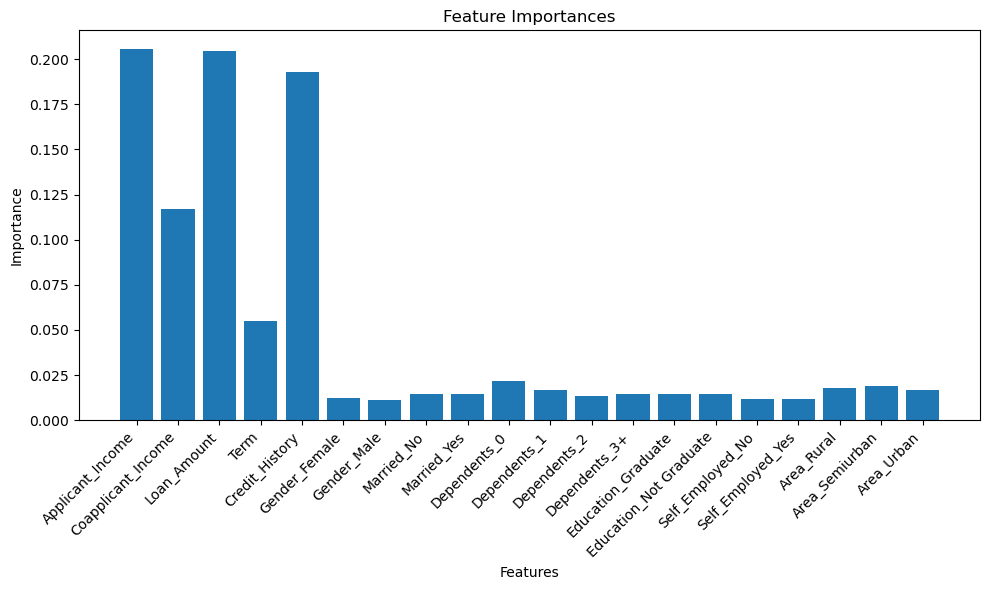

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(features,feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [63]:
np.mean(feature_importances)

0.049999999999999996

In [64]:
np.median(feature_importances)

0.015775295572638976

In [65]:
import numpy as np
from statistics import median, mode, StatisticsError

mode_value = mode(feature_importances)
print("Mode:", mode_value)


Mode: 0.20564853940140332


In [66]:
# Define Hyper Parameter tuning Grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at a leaf node
   'class_weight':[{0: w} for w in [class_weights[0]]]
}

In [67]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [68]:
# Fit GridSearchCV to Training Data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 10},
                                              n_estimators=1000),
             param_grid={'class_weight': [{0: 1.5989583333333333}],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [69]:
#Get the Best Parameters and Best Score:
best_params=grid_search.best_params_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': {0: 1.5989583333333333}, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.7943310657596372


In [70]:
#Evaluate Model on Test Data (Optional):
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8455284552845529


In [71]:
# Step 8: Train Random Forest with Best Parameters
#best_rf_model =RandomForestClassifier(**best_params, class_weight={0: class_weights[0], 1: class_weights[1]})
#best_rf_model.fit(X_train, y_train)
best_rf_model = RandomForestClassifier(**grid_search.best_params_,)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.5989583333333333}, max_depth=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [72]:
# Step 9: Make Predictions with Tuned Model on test data
y_pred_tuned = best_rf_model.predict(X_test)

In [73]:
# Step 10: Evaluate the Tuned Model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned}')

confusion_mat_tuned = confusion_matrix(y_test, y_pred_tuned)
print(f'Tuned Model Confusion Matrix:\n{confusion_mat_tuned}')

classification_rep_tuned = classification_report(y_test, y_pred_tuned)
print(f'Tuned Model Classification Report:\n{classification_rep_tuned}')

Tuned Model Accuracy: 0.8373983739837398
Tuned Model Confusion Matrix:
[[23 15]
 [ 5 80]]
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        85

    accuracy                           0.84       123
   macro avg       0.83      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



# XGBOOST CLASSIFIER

In [74]:
#install Library

!pip install xgboost
!pip install scikit-learn

In [75]:
#Step 1:Import Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

In [76]:
#Step 2: Load and Prepare Data
X1=data[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban']]
y1=data[['Status']]

In [77]:
# Step 3:Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42,stratify=y)

In [78]:
print(y1_train.Status)

154    1
239    1
448    0
471    0
273    1
      ..
222    1
349    1
26     1
96     1
354    1
Name: Status, Length: 491, dtype: int32


In [79]:
print(class_weights)

[1.59895833 0.72748815]


In [80]:
dict_weights = {0:1, 1:10}

In [81]:
# Step 4: Train XGBoost Classifier
xg_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42,class_weight=dict_weights)
xg_model.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 10}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [82]:
#Step 5:trained model to make predictions on the test set:
y1_pred = xg_model.predict(X1_test)

In [83]:
#Step 6:Evaluate the performance of the model using metrics such as accuracy, confusion matrix, and classification report:
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy1}')

confusion_mat1 = confusion_matrix(y1_test, y1_pred)
print(f'Confusion Matrix:\n{confusion_mat1}')

classification_rep1 = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep1}')

Accuracy: 0.8211382113821138
Confusion Matrix:
[[25 13]
 [ 9 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.85      0.89      0.87        85

    accuracy                           0.82       123
   macro avg       0.79      0.78      0.78       123
weighted avg       0.82      0.82      0.82       123



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

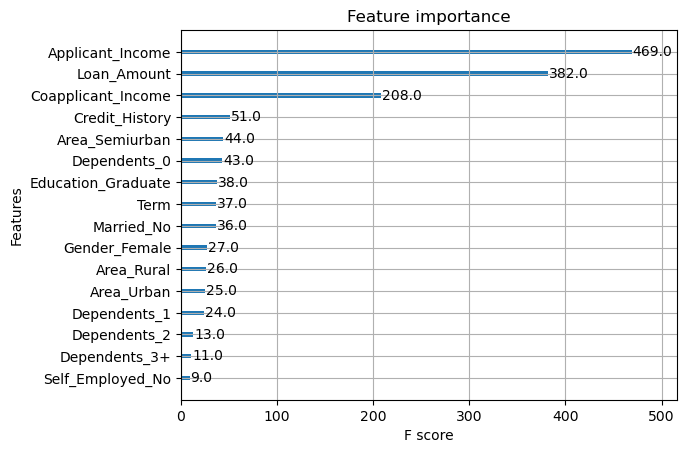

In [84]:
#Step 7:Feature Importance:
xgb.plot_importance(xg_model)

In [85]:
# Step 7: Hyperparameter Tuning used for #Optimizing Model Performance,Avoiding Overfitting or Underfitting,
#Dealing with Imbalanced Dat,Controlling Tree Structure,Increasing Robustness:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],# to check optimum rate
    'max_depth': [3, 5, 7],#10 to 15
    'n_estimators': [50, 100, 200],#100,150,250,300,400
    'class_weight':[{0: w} for w in [class_weights[0]]]
}
# A smaller learning rate often leads to more accurate models, but it requires more iterations.
#The maximum depth of a tree controls the depth to which a tree is allowed to grow during the training process. 
#Deeper trees can capture more complex patterns but may lead to overfitting.
#n_estimators determines the number of boosting rounds (trees) in the ensemble. A higher number of estimators may improve performance, but it also increases computational cost.

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X1_train, y1_train)

best_params1 = grid_search.best_params_

best_params1 = grid_search.best_params_
best_accuracy1 = grid_search.best_score_
print(f'Best hyperparameters: {best_params1}')
print(f'Best accuracy: {best_accuracy1:.3f}')

Best hyperparameters: {'class_weight': {0: 1.5989583333333333}, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best accuracy: 0.796


In [86]:
# Step 8:Update the model with the best parameters
best_xg_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params1, class_weights={0: class_weights[0]})
best_xg_model.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1.5989583333333333},
              class_weights={0: 1.5989583333333333}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, ...)

In [87]:
# Step 9: Make Predictions with Tuned Model
y1_pred_tuned = best_xg_model.predict(X1_test)

In [88]:
# Step 10: plot_importance(grid_search.best_estimator_, max_num_features=10)
plt.show()

# Decision_Tree_Classifier

In [89]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [90]:
# Step 2: Load and Prepare Data
X2=data[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban']]
y2=data[['Status']]

In [91]:
# Step 3:Split the data into training and testing sets,use stratified sampling
#By setting stratify=y, we ensure that the class distribution is preserved in both the training and testing sets.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y)


In [92]:
print(y2_train.Status)

154    1
239    1
448    0
471    0
273    1
      ..
222    1
349    1
26     1
96     1
354    1
Name: Status, Length: 491, dtype: int32


In [93]:
#Step 3(1): Compute class weights for balancing

class_weight2 = compute_class_weight('balanced', classes=np.array([0, 1]), y=y2_train.Status)

In [94]:
dict_weights1 = {0:1, 1:10}

In [95]:
# Step 4: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42,class_weight=dict_weights1)
dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [96]:
# Step 5: Make Predictions on test set
y2_pred = dt_model.predict(X2_test)

In [97]:
# Step 6: Evaluate the Model using matrix such as accuracy,confusion,classification
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy2}')

confusion_mat2 = confusion_matrix(y2_test, y2_pred)
print(f'Confusion Matrix:\n{confusion_mat2}')

classification_rep2 = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep2}')

Accuracy: 0.7642276422764228
Confusion Matrix:
[[29  9]
 [20 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.76      0.67        38
           1       0.88      0.76      0.82        85

    accuracy                           0.76       123
   macro avg       0.74      0.76      0.74       123
weighted avg       0.79      0.76      0.77       123



In [98]:
# Step 7: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']  # Include class_weight in the grid
}

grid_search = GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=2,scoring='accuracy')
grid_search.fit(X2_train, y2_train)

# Use GridSearchCV to find the best hyperparameters

GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 10},
                                              random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [99]:
#Step 7(1):Get the Best Parameters and Best Score:
best_params2 = grid_search.best_params_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.7962999834079973


In [100]:
# Step 7(2): Train Decision Tree with Best Parameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params2)
best_dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       random_state=42)

In [101]:
# Step 8: Make Predictions with Tuned Model on test and train
y2_pred_tuned = best_dt_model.predict(X2_test)

y2_pred_train = best_dt_model.predict(X2_train)


In [102]:
# Step 9: Evaluate the Tuned Model
accuracy_tuned2 = accuracy_score(y2_test, y2_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned2}')

confusion_mat_tuned2 = confusion_matrix(y2_test, y2_pred_tuned)
print(f'Tuned Model Confusion Matrix:\n{confusion_mat_tuned2}')

classification_rep_tuned2 = classification_report(y2_test, y2_pred_tuned)
print(f'Tuned Model Classification Report:\n{classification_rep_tuned2}')

Tuned Model Accuracy: 0.8048780487804879
Tuned Model Confusion Matrix:
[[22 16]
 [ 8 77]]
Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        38
           1       0.83      0.91      0.87        85

    accuracy                           0.80       123
   macro avg       0.78      0.74      0.76       123
weighted avg       0.80      0.80      0.80       123



# Logistic Regression

In [103]:
#step 1: Import Library

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [104]:
#Step 2: Load and Prepare Data
X3=data[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban']]
y3=data[['Status']]

In [105]:
# Step 3:Split the data into training and testing sets using stratified sampling
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y)

In [106]:
print(y3_train.Status)

154    1
239    1
448    0
471    0
273    1
      ..
222    1
349    1
26     1
96     1
354    1
Name: Status, Length: 491, dtype: int32


In [107]:
# Step 4: Compute class weights for balancing
class_weight2 = compute_class_weight('balanced', classes=np.array([0, 1]), y=y3_train.Status)

In [108]:
dict_weights2 = {0:1, 1:10}

In [109]:
# Step 4:Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42,class_weight=dict_weights2)
log_reg.fit(X3_train, y3_train)

LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)

In [110]:
# Step 5: Make Predictions on test set
y3_pred = log_reg.predict(X3_test)

In [111]:
# Step 6: Evaluate the Model using matrix such as accuracy,confusion,classification
accuracy3 = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy3}')

confusion_mat3 = confusion_matrix(y3_test, y3_pred)
print(f'Confusion Matrix:\n{confusion_mat3}')

classification_rep3 = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep3}')


Accuracy: 0.6910569105691057
Confusion Matrix:
[[ 0 38]
 [ 0 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



In [112]:
# Step 7: Define hyperparameters for tuning
param_grid3 = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'class_weight': [{0: w} for w in [class_weight2[0]]]  # Include class_weight in the grid
}

# Initialize GridSearchCV
grid_search3 = GridSearchCV(estimator=log_reg, param_grid=param_grid3, cv=5, scoring='accuracy')
# Perform GridSearchCV to find the best hyperparameters
grid_search3.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1, 1: 10},
                                          random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1.594155844155844}],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [113]:
# Step 8:Get the best hyperparameters and Best Score:
best_params_log = grid_search3.best_params_
print("Best Hyperparameters:", best_params_log)
print("Best Score:", grid_search3.best_score_)

Best Hyperparameters: {'C': 0.1, 'class_weight': {0: 1.594155844155844}, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8004329004329005


In [114]:
# Step 9:Train the model with the best hyperparameters
best_model_log = LogisticRegression(random_state= 42,**best_params_log)
best_model_log.fit(X3_train, y3_train)

LogisticRegression(C=0.1, class_weight={0: 1.594155844155844}, penalty='l1',
                   random_state=42, solver='liblinear')

In [115]:
# Step 10:Make predictions on the testing set
y3_pred_log = best_model_log.predict(X3_test)

In [116]:
# Step 11:Evaluate the model
accuracy3 = accuracy_score(y3_test, y3_pred_log)
conf_matrix3 = confusion_matrix(y3_test, y3_pred_log)

print("Accuracy:", accuracy3)
print("Confusion Matrix:\n", conf_matrix3)

Accuracy: 0.8536585365853658
Confusion Matrix:
 [[22 16]
 [ 2 83]]
